# Demo of how to use the captum XAI library in python using Torch and Torchvision

In [1]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from captum.attr import GradientShap
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

/home/ptandon1/git/xai-samples/.venv/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/ptandon1/git/xai-samples/.venv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/ptandon1/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:14<00:00, 3.29MB/s]


(-0.5, 223.5, 223.5, -0.5)

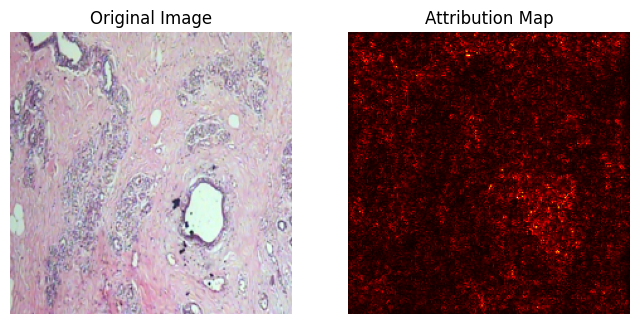

In [2]:
# Step 1: Load pretrained model
model = models.resnet18(pretrained=True)
model.eval()

# Step 2: Load and preprocess image
img_path = 'data/slide.png'  # Replace with path to a local 3-channel image
img = Image.open(img_path).convert("RGB")

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

input_tensor = transform(img).unsqueeze(0)  # Shape: (1, 3, 224, 224)

# Step 3: Prepare baseline (black image of same shape)
baseline = torch.zeros_like(input_tensor)

# Step 4: Run Gradient SHAP
gradient_shap = GradientShap(model)

# Pick a target class (e.g., class 243 = "bull mastiff" in ImageNet)
target_class = 243

# Get attributions
attributions = gradient_shap.attribute(
    input_tensor, baselines=baseline, target=target_class, n_samples=50
)

# Step 5: Visualize
attr = attributions.squeeze().detach().numpy()
attr = np.transpose(attr, (1, 2, 0))  # Convert to HWC
attr = np.mean(np.abs(attr), axis=2)  # Collapse RGB to grayscale heatmap

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(img.resize((224, 224)))
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(attr, cmap='hot')
plt.title("Attribution Map")
plt.axis('off')